# An Analysis of Baltimore Towing Trends
## IST 5520: Data Science w/ Python 
### By: Noah Donnelly, Nana Amoah, Quintin Sargent, Ethan Hisle, Joseph Rae 
#### December 1, 2021



# 1) Introduction

Scenario: Over the past 12 years in Baltimore there were more than 265,000 instances of towed vehicles. Baltimore kept detailed records including the vehicle make, model, the tow contractor, the location of the vehicle at the time of the tow, the price of the tow, and where the vehicle was stored. Suppose that the City of Baltimore is performing an audit to ensure that their towing practices are unbiased. They are interested in determining if they are unfairly favoring one towing company, if they are unfairly towing specific models and makes of cars, or tow cars from other states more often than others. They hired us, a data science contractor to analyze their data and present the outcome as a neutral party.

Some questions that could be analysed for checking if the city of Baltimore has been biased in towing are:
 - Is the city of Balitmore unfairly favoring one towing company over the other compeititors?
 - Is the city of Balitmore towing specific types of vehicles more than others?
 - Is the city of Balitmore towing visiting and traveling vistiors disportionally to local residents?
 - Can we predict if a car will be auctioned based on different attributes in the data set?
 
 Articles and Reports related to bias and corruption problems within the city of Baltimore:
 - https://foxbaltimore.com/news/local/ig-report-city-towing-contractor-sold-towed-vehicles
 - https://foxbaltimore.com/news/local/in-depth-maryland-leaders-and-corruption
 - https://www.baltimoresun.com/latest/bs-md-ci-officer-guilty-20111208-story.html
 - https://www.baltimoresun.com/maryland/bs-md-towing-history-20110223-story.html

The dataset has met all of the criteria required for the project, as the dataset:
 - It has 39 columns and 265,816 rows so it is large enough to analyze using data science techniques. 
 - The data is not clean. This dataset contains many missing values and the time data will need to be reformatted for ease of   analysis along with many other adjustments. 
 - As far as we have been able to discover, the dataset has not been analyzed by anyone on the internet. The dataset appears to be untouched (this could possibly be due to its restricted access). 

## 1.2) Variables we will use in the analysis

- TowedDateTime (Date, The date and time the car was towed.)
- PickupType (String, The reason the car was towed.)
- VehicleType (String, The type of the car.) 
- VehicleYear (String, The year of the car.)
- VehicleMake (String, The manufacturer of the car.)
- VehicleModel (String, The model of the car.)
- VehicleColor (String, The color of the car.)
- TagState (String, The state the car was registered in.)
- TowCompany (String, The compmany contracted to tow the car.)
- TowCharge (Double, The amount charged by the tower to tow the car.)
- TowedFromLocation (String, Where the car was when it was towed.)
- ReceivingDateTime (Date, The date and time the car was received at the yard.)
- StorageYard (String, The storage yard the car was towed to.)
- StorageLocation (String, The location of the storage yard.)
- HoldDateTime (Date, The date and time the car began to be held.)
- HoldReleasedDateTime (Date, The date and time the car was released.)
- HoldReleasedNotifyDate (Date, The date and time they notify the owner.)
- RemovedFromYardDate (Date, the date and time the car was removed from the yard.) 
- Status (String, The status of the car (released, auctioned, etc.)
- ReleaseDateTime (Date, The date and time the car was released.)
- ReleaseType (String, How the car was picked up/realeased.)
- TotalPaid (Double, The amount of money paid.)

# 2) Data Source and Collection

Data Source and Collection
The dataset is downloadable as a csv file (currently the api is not working, or may require special authorization to download,so we may have to use a web scraper to get the data).
The data sources are: 

 - [ArcGIS Table](https://data.baltimorecity.gov/datasets/93884de333ae43118871ca47624eb31c/explore)
 - [Table Description](https://catalog.data.gov/dataset/towing-3d0dc)
 - [Raw Data](https://www.arcgis.com/home/item.html?id=93884de333ae43118871ca47624eb31c&sublayer=0&sortOrder=desc&sortField=defaultFSOrder#data)


# Data Manipulation

In [1]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Towing.csv',sep = ',')
df.sample(3).transpose()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,7,15,17,18,20,26,27,28,29,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,135868,108714,3282
PropertyNumber,P276210,P249044,F301450
TowedDateTime,2014/05/01 15:28:00+00,2012/12/07 17:00:00+00,2013/02/26 16:35:00+00
PickupType,Relocate,Impound (Illegal Parking),Parking Violation
VehicleType,Car,Car,NaN
VehicleYear,06,11,05
VehicleMake,Honda,Subaru,HONDA
VehicleModel,Accord,Legacy,CIVIC
VehicleColor,Gold,Black,NaN
TagNumber,NaN,61247CD,6ATW16
TagState,NaN,MD,MD


These columns were not very usefull mostly due to the high number of null variables so we dropped them.

In [3]:
dfDropped = df.drop(['TRDateTime','PersonalPropRemoved',
                     'PersonalPropLeftInVehicle','HoldType','ESRI_OID'], axis = 1)
dfDropped.sample(3).transpose()

,229614,202617,116932
PropertyNumber,P370019,P343012,P257264
TowedDateTime,2018/10/15 08:05:00+00,2017/07/01 05:35:00+00,2013/05/13 22:20:00+00
PickupType,Stolen Recovered,Stolen Recovered,Police Action
VehicleType,Car,Car,Scooter
VehicleYear,13,4,12
VehicleMake,Acura,Nissan,Dongfang
VehicleModel,Tsx,Altima,SUNNY 150
VehicleColor,Black,White,Blue
TagNumber,2DB4537,9CB5814,NaN
TagState,MD,MD,NaN


## Changing column types

change year to numeric

In [4]:
dfDropped["VehicleYear"] = pd.to_numeric(df["VehicleYear"].str.replace("[^0-9.]",""))
def custom_year(year):
    if pd.isna(year):
        return np.nan
    if year <10:
        return 2021 - float("200"+str(year))
    if year<=21:
        return 2021 - float("20"+str(year))
    if year>=21 and year<=1900:
        return 2021 - float("19"+str(year))
    else:
        return 2021 - float(year)
        
dfDropped['VehicleAge'] = dfDropped.apply(lambda x: custom_year(x['VehicleYear']),axis=1)

In [5]:
dfDropped.sample(5)

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,HoldDateTime,HoldReleasedDateTime,HoldReleasedNotifyDate,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge
210172,P350570,2017/10/30 18:12:00+00,Accident,Car,NaN,Buick,Lesabra,Green,5CK1930,MD,...,NaN,NaN,NaN,2017/11/15 00:00:00+00,0.0,Released,2017/11/15 10:28:00+00,Reclaimed by Insurer,430.0,NaN
175151,P315522,2016/04/05 02:10:00+00,Accident,Car,4.0,Toyota,Solara,Black,5CE3050,MD,...,2016/04/06 11:51:00+00,2018/03/06 15:23:00+00,2018/03/06 00:00:00+00,2018/06/06 00:00:00+00,0.0,Auctioned,2018/06/06 08:00:00+00,Auctioned,0.0,17.0
166534,P306889,2015/11/07 14:55:00+00,Accident (Owner/Operator Hospitalized),Car,14.0,Ford,Focus Se,Black,7BV5227,MD,...,NaN,NaN,NaN,2015/11/09 00:00:00+00,0.0,Released,2015/11/09 15:07:00+00,Reclaimed by Insurer,220.0,7.0
122565,P262900,2013/08/22 12:36:00+00,Police Action (Arrest of Operator),Scooter,10.0,Delray,MD50QT-9,Silver/Blk,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,11.0
242112,P382530,2019/08/04 12:30:00+00,Abandoned (Towed by City),SUV,11.0,Nissan,Murano,Black,5CZ8383,MD,...,NaN,NaN,NaN,2019/11/06 00:00:00+00,0.0,Auctioned,2019/11/06 08:00:00+00,Auctioned,0.0,10.0


## Dealing With Null Values

In [6]:
#finds the total number of columns with null values
sum([True for idx,row in dfDropped.iterrows() if any(row.isnull())])

253520

Maybe dropping columns with a lot of NaNs will help.

In [7]:
dfDropped = dfDropped.drop(["HoldDateTime","HoldReleasedDateTime","HoldReleasedNotifyDate"],axis=1)

For less important catigorical variables a unknown type could be added.

In [8]:
def addUnknown(thing):
    if pd.isna(thing):
        return "Unknown"
    else:
        return thing
toChange = ["PickupType","VehicleType","VehicleMake","VehicleModel","VehicleColor","Status","ReleaseType"]
for col in toChange:
    dfDropped[col] = dfDropped.apply(lambda x: addUnknown(x[col]),axis=1)

In [9]:
dfDropped.sample(2)

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,StorageLocation,StorageTelephone,TitleRenounciation,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge
86285,P226600,2011/10/24 02:59:00+00,Stolen Recovered,Van,95.0,Dodge,Caravan,Silver,1AE0141,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2011/10/24 00:00:00+00,1.0,Released,2011/10/24 12:47:00+00,Reclaimed by Owner,140.0,26.0
107852,P248182,2012/11/21 05:28:00+00,Police Action (Misc.),Car,8.0,Chevrolet,Cobalt,Grey,HDN9484,PA,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2012/11/23 00:00:00+00,0.0,Released,2012/11/23 11:56:00+00,Reclaimed by Owner,235.0,13.0


In [10]:
#sum([True for idx,row in dfDropped.iterrows() if any(row.isnull())])

Drop The remaining rows with NaN

In [11]:
dfDropped = dfDropped.dropna()

In [12]:
dfDropped.sample(10)

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,StorageLocation,StorageTelephone,TitleRenounciation,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge
78842,P219148,2011/06/13 16:20:00+00,Accident,Car,5.0,Toyota,Corolla,Grey,MLS718,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2011/06/14 00:00:00+00,0.0,Released,2011/06/14 14:12:00+00,Reclaimed by Insurer,220.0,16.0
104477,P244804,2012/09/21 10:22:00+00,Stolen Recovered,SUV,95.0,Chevrolet,Blazer,Red,A216771,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2012/09/25 00:00:00+00,1.0,Released,2012/09/25 16:37:00+00,Reclaimed by Insurer,140.0,26.0
67811,P208111,2010/11/18 11:39:00+00,Scofflaw,Car,95.0,Saab,900S,White,YSA7314,NC,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2010/11/18 00:00:00+00,0.0,Released,2010/11/18 16:20:00+00,Reclaimed by Owner,397.0,26.0
183304,P323694,2016/08/15 02:09:00+00,Accident,SUV,98.0,Ford,Expedition,White,1BT7125,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2016/08/24 00:00:00+00,0.0,Released,2016/08/24 12:56:00+00,Reclaimed by Insurer,340.0,23.0
180762,P321150,2016/07/03 11:27:00+00,Scofflaw,Car,4.0,Toyota,Solara,White,2BW0150,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2016/07/05 00:00:00+00,0.0,Released,2016/07/05 14:02:00+00,Reclaimed by Owner,788.0,17.0
91372,P231690,2012/01/30 14:00:00+00,Stolen Recovered,Car,4.0,Mercury,Sable,Burgundy,4AM7686,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2012/02/04 00:00:00+00,1.0,Released,2012/02/04 13:43:00+00,Reclaimed by Owner,130.0,17.0
142115,P282461,2014/08/22 13:50:00+00,Scofflaw,Car,96.0,Chevrolet,Monte Carlo,Red,2BE5281,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2014/09/16 00:00:00+00,0.0,Released,2014/09/16 15:00:00+00,Reclaimed by Owner,1053.0,25.0
188923,P329314,2016/11/14 01:50:00+00,Burns,Car,98.0,Honda,Accord,Purple,2BB0101,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2017/04/26 00:00:00+00,0.0,Auctioned,2017/04/26 08:00:00+00,Auctioned,0.0,23.0
84908,P225216,2011/09/27 17:53:00+00,Abandoned (Towed by City),Car,95.0,Toyota,Corolla,Green,MAC513,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2011/10/19 00:00:00+00,1.0,Auctioned,2011/10/19 08:00:00+00,Auctioned,0.0,26.0
109005,P249335,2012/12/12 23:10:00+00,Police Action (Arrest of Operator),Car,8.0,Nissan,Altima,Black,6FZL21,MD,...,"6700 Pulaski Highway Baltimore, Maryland 21237",(410) 396-9958,0.0,2012/12/17 00:00:00+00,0.0,Released,2012/12/17 16:41:00+00,Reclaimed by Owner,465.0,13.0


## Dealing With Time

In [13]:
from datetime import datetime, timedelta

In [14]:
dfDropped["ReceivingDateTime"] = pd.to_datetime(dfDropped["ReceivingDateTime"], format='%Y/%m/%d %H:%M')
dfDropped["ReleaseDateTime"] = pd.to_datetime(dfDropped["ReleaseDateTime"], format='%Y/%m/%d %H:%M')

In [15]:
dfDropped["ReceivingDateTime"].mean()
dfDropped["ReleaseDateTime"].mean()

Timestamp('2014-02-25 19:53:00.106125568+0000', tz='UTC')

In [16]:
#Calculate The Amount of Time from Tow to Release:
dfDropped["ReceivedToRelease"] = dfDropped["ReleaseDateTime"]-dfDropped["ReceivingDateTime"]
dfDropped["ReceivedToRelease"].mean()

Timedelta('29 days 05:04:11.337517')

In [17]:
def calculate_days(time):
    if time.days >= 0:
        return time.days
    else:
        return 0

dfDropped['DaysTillReleased'] = dfDropped['ReceivedToRelease'].apply(lambda x: calculate_days(x))

## Detecting Outliers

In [18]:
dfDropped.describe()

,VehicleYear,TowCharge,TitleRenounciation,StolenVehicleFlag,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
count,122690.000000,122690.000000,122690.000000,122690.000000,122690.000000,122690.000000,122690,122690.000000
mean,29.802967,137.288849,0.004988,0.163159,284.452843,17.925373,29 days 05:04:11.337517,28.716024
std,40.108429,400.711692,0.070451,0.369512,272.789797,6.049497,102 days 07:26:34.652642,101.754406
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3593 days +21:45:00,0.000000
25%,3.000000,130.000000,0.000000,0.000000,140.000000,14.000000,1 days 16:15:00,1.000000
50%,7.000000,130.000000,0.000000,0.000000,235.000000,18.000000,4 days 17:04:00,4.000000
75%,90.000000,130.000000,0.000000,0.000000,326.000000,22.000000,21 days 00:00:30,20.750000
max,99.000000,140000.000000,1.000000,1.000000,6794.000000,94.000000,3063 days 23:08:00,3063.000000


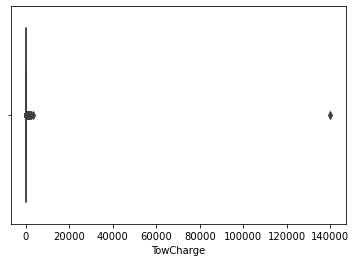

In [19]:
#Detecting outliers among the TowCharge column

boxplot1 = sns.boxplot(x=dfDropped["TowCharge"])

In [20]:
# Calculate the first quantile
first_quantile = dfDropped['TowCharge'].quantile(0.25)

# Calculate the first quantile
third_quantile = dfDropped['TowCharge'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

#prints df with all the outliers
TowChargeOut = pd.concat([dfDropped[dfDropped['TowCharge']<first_quantile-1.5*IQR],
dfDropped[dfDropped['TowCharge']>third_quantile+1.5*IQR]])

print(len(TowChargeOut))
TowChargeOut.sample(5)

28704


,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,TitleRenounciation,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
70283,P210584,2011/01/08 21:19:00+00,Accident,SUV,2.0,Jeep,Liberty,White,3MD9309,MD,...,0.0,2011/01/10 00:00:00+00,0.0,Released,2011-01-10 10:11:00+00:00,Reclaimed by Owner,305.0,19.0,1 days 12:52:00,1
90524,P230842,2012/01/14 18:46:00+00,Police Action (Arrest of Operator),SUV,10.0,Landrover,Unknown,Black,3AA8383,MD,...,0.0,2012/01/17 00:00:00+00,0.0,Released,2012-01-17 10:02:00+00:00,Reclaimed by Owner,245.0,11.0,2 days 15:16:00,2
73416,P213719,2011/03/12 04:45:00+00,Police Action (Arrest of Operator),Car,5.0,Acura,Rl,Gray,1FVZ70,MD,...,0.0,2011/03/12 00:00:00+00,0.0,Released,2011-03-12 15:21:00+00:00,Reclaimed by Owner,230.0,16.0,0 days 10:36:00,0
145620,P285967,2014/10/25 07:10:00+00,Burns,Car,12.0,Nissan,Maxima,Gray,5AS1763,MD,...,0.0,2014/12/16 00:00:00+00,1.0,Released,2014-12-16 13:12:00+00:00,Reclaimed by Insurer,310.0,9.0,52 days 06:02:00,52
95808,P236130,2012/04/21 05:44:00+00,ACCIDENT,Car,5.0,Audi,A8,Black,5ABG88,MD,...,0.0,2012/04/25 00:00:00+00,0.0,Released,2012-04-25 15:23:00+00:00,Reclaimed by Insurer,245.0,16.0,4 days 09:39:00,4


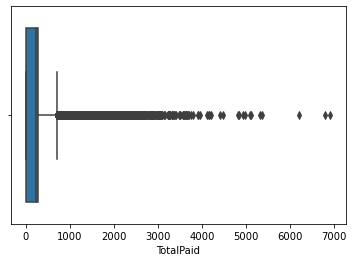

In [21]:
#Detecting outliers among the TotalPaid column
boxplot2 = sns.boxplot(x=df["TotalPaid"])

In [22]:
# Calculate the first quantile
first_quantile = dfDropped['TotalPaid'].quantile(0.25)

# Calculate the first quantile
third_quantile = dfDropped['TotalPaid'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

#prints df with all the outliers
TotalPaidOut = pd.concat([dfDropped[dfDropped['TotalPaid']<first_quantile-1.5*IQR],
dfDropped[dfDropped['TotalPaid']>third_quantile+1.5*IQR]])

print(len(TotalPaidOut))
TotalPaidOut.sample(5)

10729


,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,TitleRenounciation,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
135236,P275578,2014/04/20 01:45:00+00,Burns,Car,7.0,Acura,Mdx,Silver,4BA7984,MD,...,0.0,2015/09/18 00:00:00+00,0.0,Released,2015-09-18 09:25:00+00:00,Reclaimed by Insurer,716.0,14.0,516 days 07:40:00,516
61471,P201767,2010/07/23 14:40:00+00,Scofflaw,SUV,3.0,Land Rover,Range Rover,Black,47617M7,MD,...,0.0,2010/07/26 00:00:00+00,0.0,Released,2010-07-26 14:53:00+00:00,Reclaimed by Owner,694.0,18.0,3 days 00:13:00,3
61193,P201489,2010/07/18 14:39:00+00,Scofflaw,Car,95.0,Volkswagen,Jetta,Burgundy,4CMF46,MD,...,0.0,2010/07/20 00:00:00+00,0.0,Released,2010-07-20 17:01:00+00:00,Reclaimed by Owner,740.0,26.0,2 days 02:22:00,2
149864,P290214,2015/01/17 01:09:00+00,Police Action (Misc.),Car,13.0,Nissan,Altima,Red,987YZU,CO,...,0.0,2015/01/22 00:00:00+00,0.0,Released,2015-01-22 12:25:00+00:00,Reclaimed by Owner,767.0,8.0,5 days 11:16:00,5
108764,P249094,2012/12/08 10:32:00+00,Police Action (Misc.),SUV,5.0,Kia,Sorento,Burgundy,5MD0620,MD,...,0.0,2012/12/19 00:00:00+00,0.0,Released,2012-12-19 09:23:00+00:00,Reclaimed by Owner,2030.0,16.0,10 days 22:51:00,10


Find outliers in year

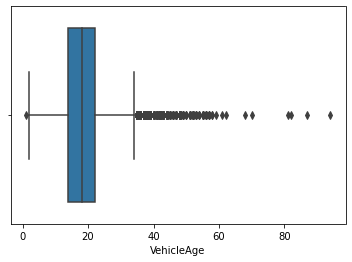

In [23]:
boxplot2 = sns.boxplot(x= dfDropped["VehicleAge"])

In [24]:
# Calculate the first quantile
first_quantile = dfDropped['VehicleAge'].quantile(0.25)

# Calculate the first quantile
third_quantile = dfDropped['VehicleAge'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

#prints df with all the outliers
YearOut = pd.concat([dfDropped[dfDropped['VehicleAge']<first_quantile-1.5*IQR],
dfDropped[dfDropped['VehicleAge']>third_quantile+1.5*IQR]])

print(len(YearOut))

752


Since we would lose so much data if we dropped all the outliers we chose not to drop all the outliers.

In [25]:
dfNew = dfDropped

In [26]:
#dfNew = dfDropped.drop(TowChargeOut.index, errors='ignore')
#dfNew = dfNew.drop(TotalPaidOut.index, errors='ignore')
#dfNew = dfNew.drop(YearOut.index, errors='ignore')

In [27]:
dfNew.sample(5)

,PropertyNumber,TowedDateTime,PickupType,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,TagNumber,TagState,...,TitleRenounciation,RemovedFromYardDate,StolenVehicleFlag,Status,ReleaseDateTime,ReleaseType,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
78631,P218937,2011/06/10 02:36:00+00,Police Action (Misc.),Car,0.0,Toyota,Avalon,Gray,3CSC46,MD,...,0.0,2011/06/10 00:00:00+00,0.0,Released,2011-06-10 12:30:00+00:00,Reclaimed by Owner,220.0,21.0,0 days 09:54:00,0
86122,P226437,2011/10/21 02:53:00+00,Accident (Death of Operator),SUV,2.0,Dodge,Durango,Black,T90AYE,NJ,...,0.0,2011/12/13 00:00:00+00,0.0,Released,2011-12-13 10:15:00+00:00,Reclaimed by Insurer,980.0,19.0,53 days 07:22:00,53
135598,P275940,2014/04/26 21:44:00+00,Stolen Recovered,Van,95.0,Chevrolet,SPORRT VAN G20,Green,8AZ0374,MD,...,0.0,2014/06/11 00:00:00+00,1.0,Auctioned,2014-06-11 08:00:00+00:00,Auctioned,0.0,26.0,45 days 10:16:00,45
177877,P318249,2016/05/19 10:28:00+00,Stolen Recovered,Car,12.0,Nissan,Altima,Silver,3BG2442,MD,...,0.0,2016/05/25 00:00:00+00,1.0,Released,2016-05-25 12:18:00+00:00,Reclaimed by Insurer,130.0,9.0,6 days 01:50:00,6
58331,P198625,2010/05/28 22:54:00+00,Accident (Owner/Operator Hospitalized),SUV,4.0,Jeep,Cherokee,Gray,43594M8,MD,...,0.0,2010/07/28 00:00:00+00,0.0,Auctioned,2010-07-28 08:00:00+00:00,Auctioned,0.0,17.0,60 days 09:06:00,60


In [28]:
dfNew.describe()

,VehicleYear,TowCharge,TitleRenounciation,StolenVehicleFlag,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
count,122690.000000,122690.000000,122690.000000,122690.000000,122690.000000,122690.000000,122690,122690.000000
mean,29.802967,137.288849,0.004988,0.163159,284.452843,17.925373,29 days 05:04:11.337517,28.716024
std,40.108429,400.711692,0.070451,0.369512,272.789797,6.049497,102 days 07:26:34.652642,101.754406
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3593 days +21:45:00,0.000000
25%,3.000000,130.000000,0.000000,0.000000,140.000000,14.000000,1 days 16:15:00,1.000000
50%,7.000000,130.000000,0.000000,0.000000,235.000000,18.000000,4 days 17:04:00,4.000000
75%,90.000000,130.000000,0.000000,0.000000,326.000000,22.000000,21 days 00:00:30,20.750000
max,99.000000,140000.000000,1.000000,1.000000,6794.000000,94.000000,3063 days 23:08:00,3063.000000


## Data Exploration

In [29]:
sns.set(rc = {'figure.figsize':(15,8)})

### Is the city of Balitmore unfairly favoring one towing company over the other compeititors?

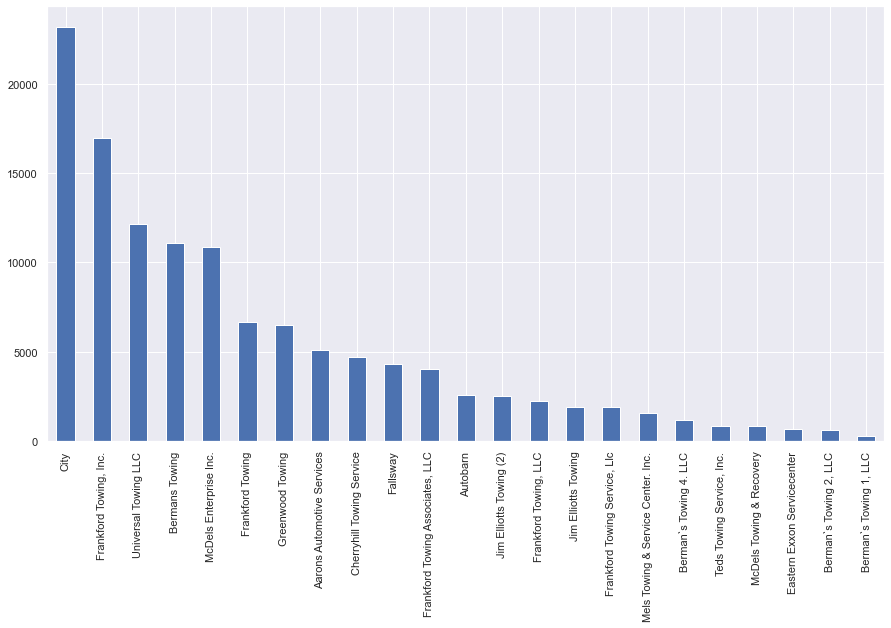

In [30]:
dfNew['TowCompany'].value_counts().plot(kind='bar')

It looks like there is more than 1 entry for each of the different towing companies. These should be combined together.

In [31]:
dfNew['TowCompany'] = dfNew['TowCompany'].str.replace('\s([\s\S]*)$', '')
dfNew['TowCompany'] = dfNew['TowCompany'].str.replace('[^a-zA-Z\d\s:]', '')

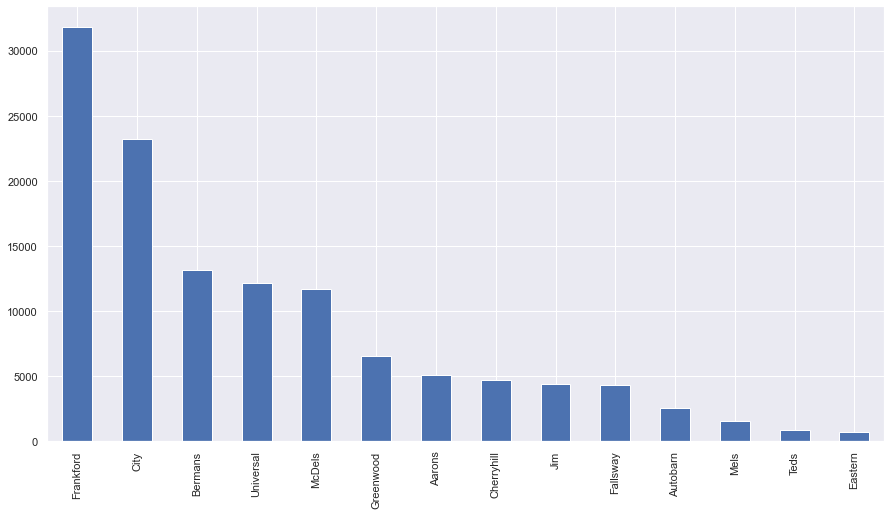

In [32]:
dfNew['TowCompany'].value_counts().plot(kind='bar')

Frankford is the most popular towing company followed by the city and Bermans.

### Is the city of Balitmore towing specific types of vehicles more than others? Are different types of vehicles charged different amounts?

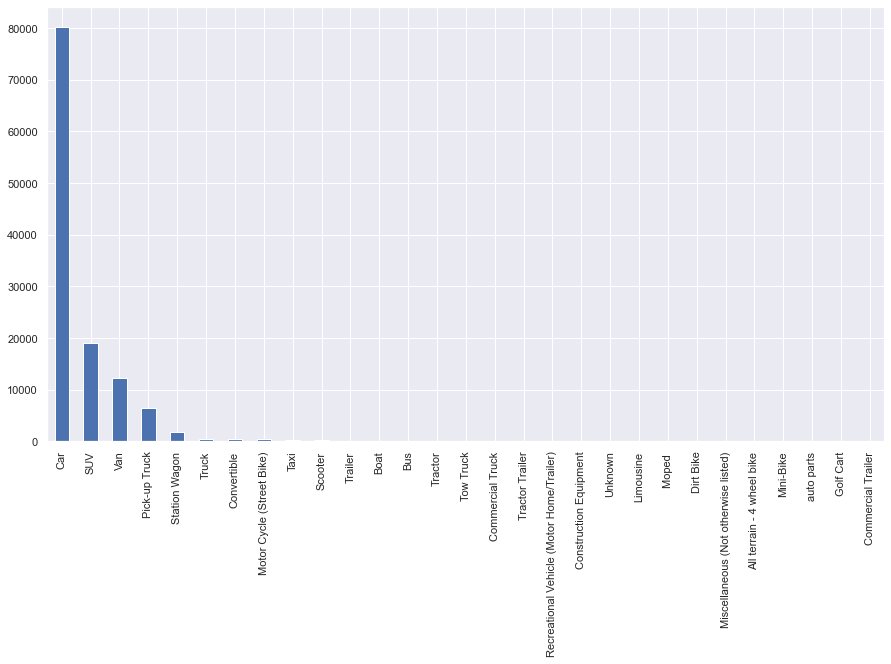

In [33]:
dfNew['VehicleType'].value_counts().plot(kind='bar')

As expected the most popular types of vehicles are towed the most.

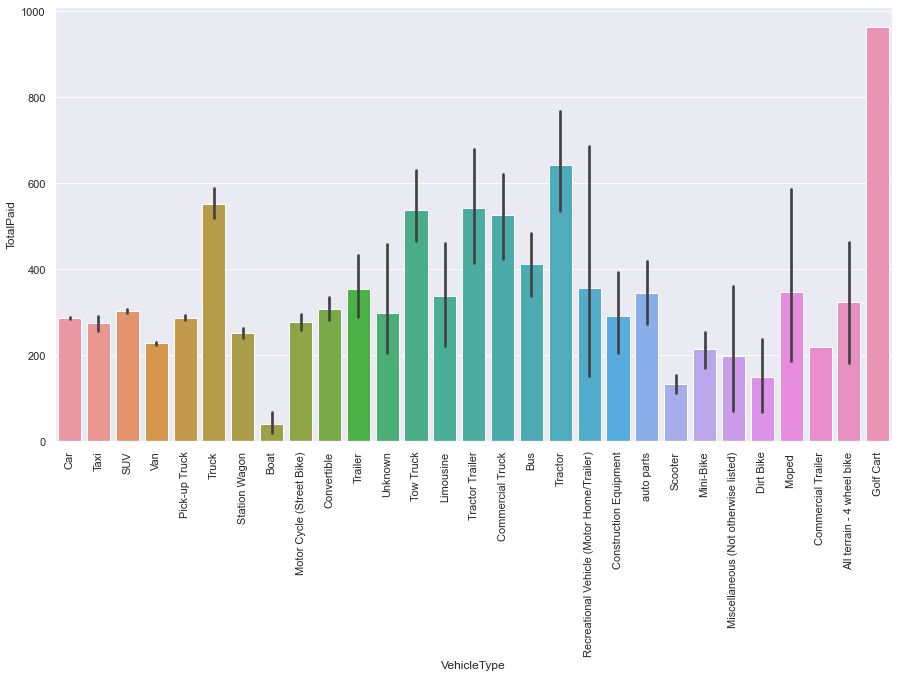

In [34]:
ax = sns.barplot(x="VehicleType", y="TotalPaid", data=dfNew)
ax.tick_params(axis='x', rotation=90)


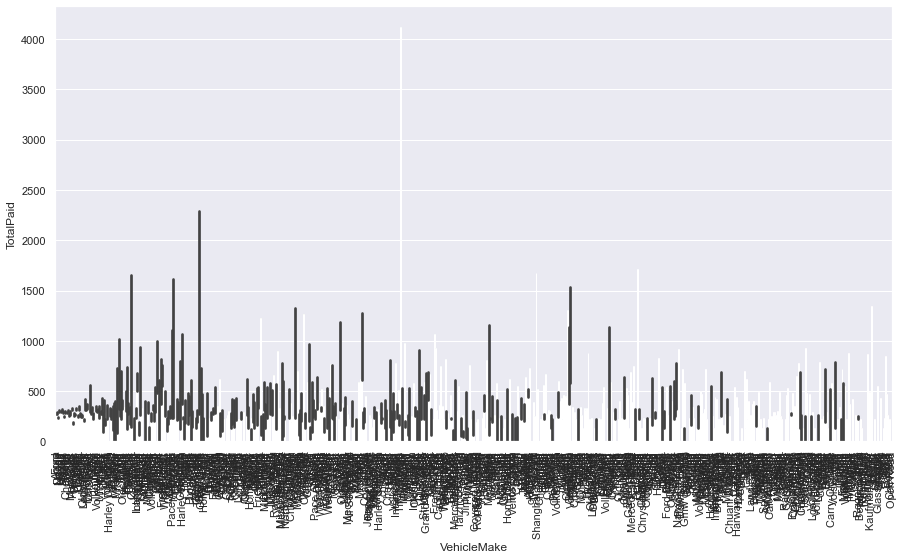

In [35]:
ax = sns.barplot(x="VehicleMake", y="TotalPaid", data=dfNew)
ax.tick_params(axis='x', rotation=90)

It seems that smaller vehicles like dirt bikes and scooters have the lowest tow charge and some of the biggest vehicles such as tractors and trucks have the highest tow charge.

### Is the city of Balitmore towing visiting and traveling vistiors disportionally to local residents?

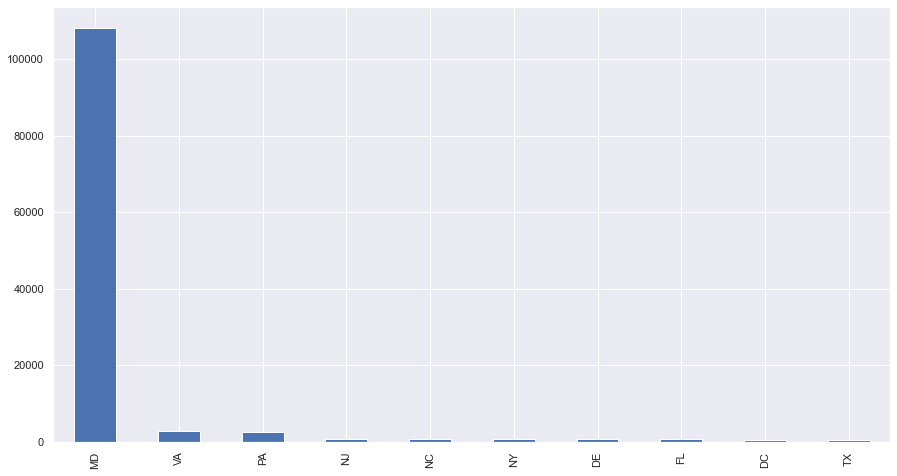

In [36]:
#Graph of the top 10 states vehicles are towed from
dfNew['TagState'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

Most of the vehicles towed are from Maryland folowed by Virgia and Pennsylvania which are adjacent states. 

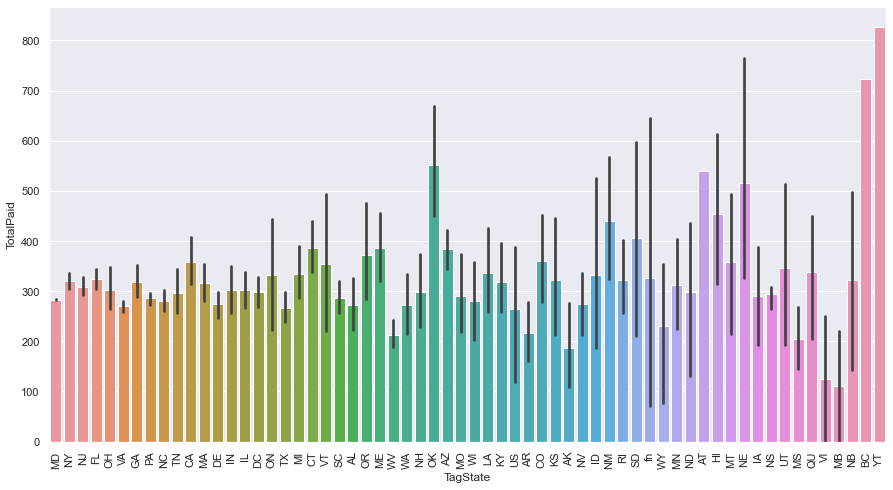

In [37]:
ax = sns.barplot(x="TagState", y="TotalPaid", data=dfNew)
ax.tick_params(axis='x', rotation=90)

### Other Graphs

Text(0.5, 0, 'Age')

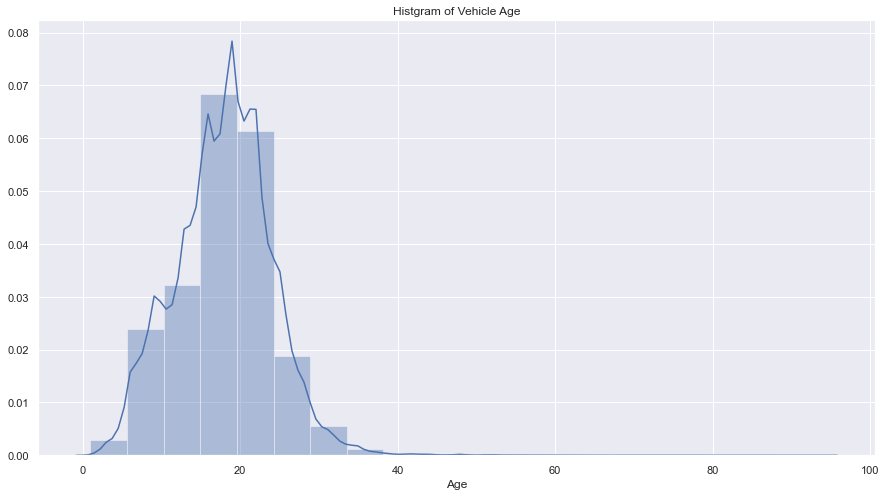

In [38]:
ax = sns.distplot(dfNew['VehicleAge'], bins=20)
ax.set_title('Histgram of Vehicle Age')
ax.set_xlabel('Age')

It seems like most cars towed are around 20 years old but some are much older. Probably antique cars.

Text(0.5, 0, 'Cost')

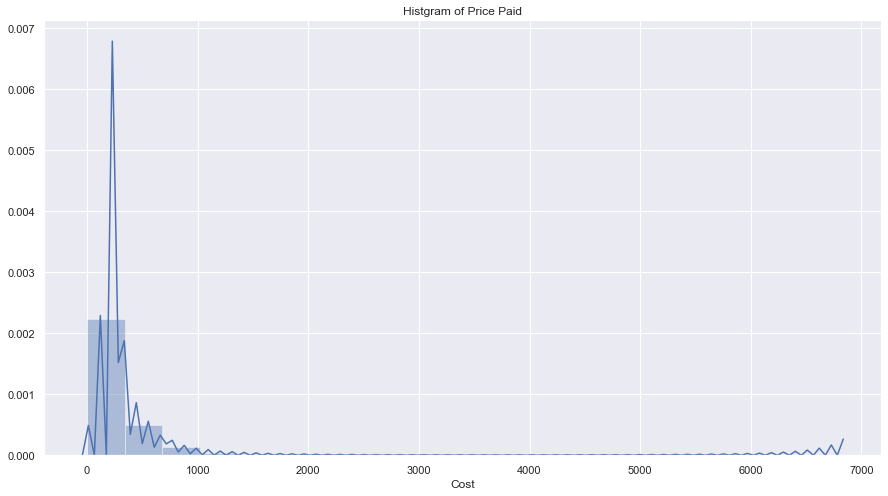

In [39]:
ax = sns.distplot(dfNew['TotalPaid'],bins=20)
ax.set_title('Histgram of Price Paid')
ax.set_xlabel('Cost')

It looks like there are 3 common prices and then some less common amounts afterwords.

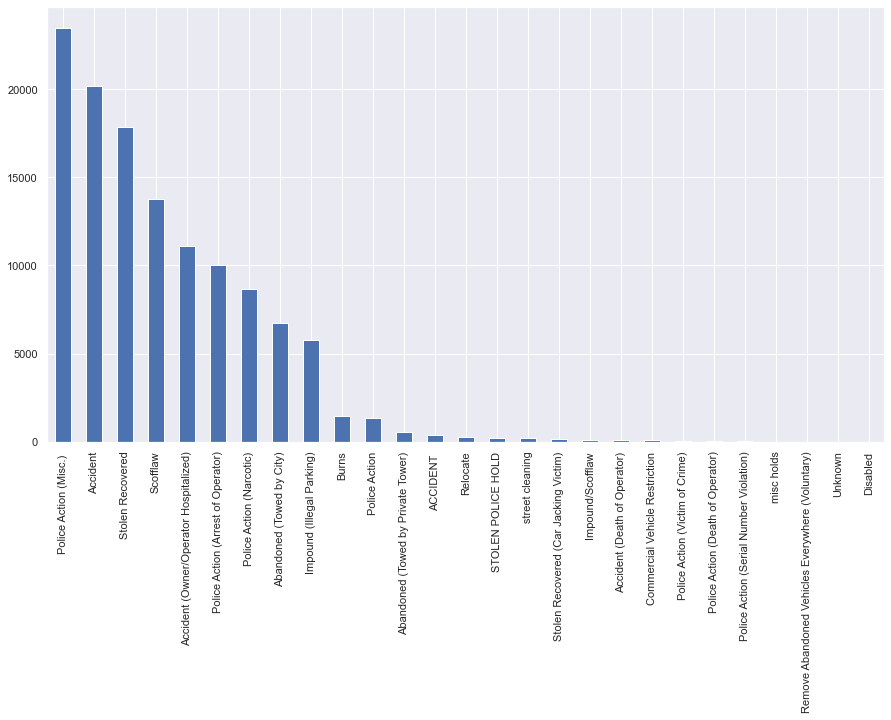

In [40]:
dfNew['PickupType'].value_counts().plot(kind='bar')

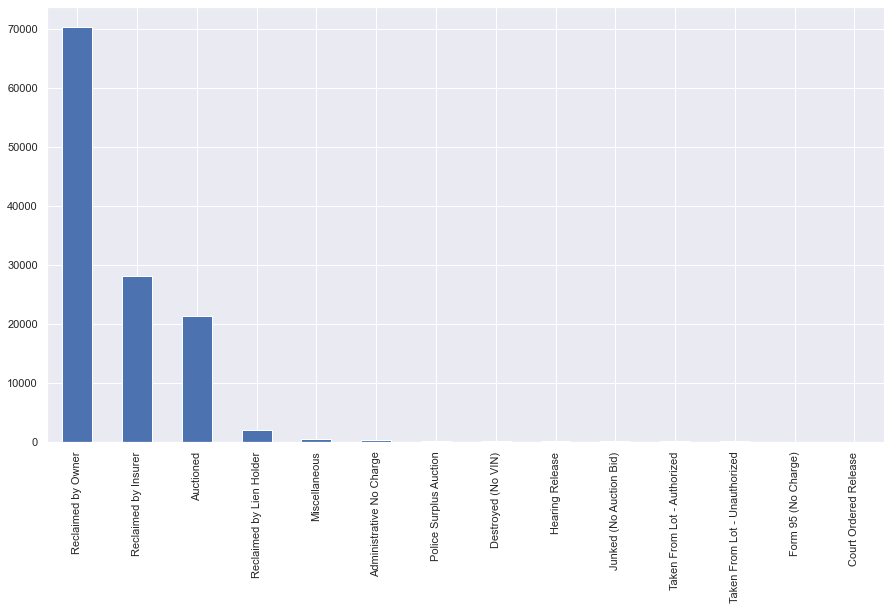

In [41]:
dfNew['ReleaseType'].value_counts().plot(kind='bar')

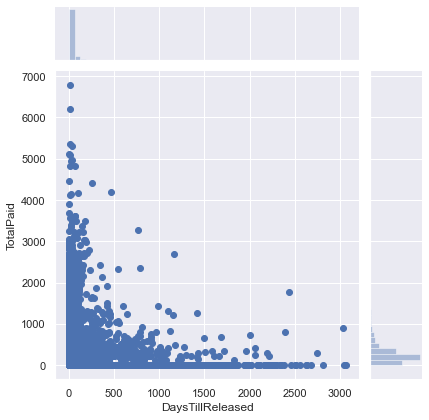

In [42]:
# Use seaborn to draw scatterplot
ax = sns.jointplot(x="DaysTillReleased", y="TotalPaid", data=dfNew[['DaysTillReleased','TotalPaid']])
#ax.set_axis_labels('% lower status of the population','house price')

It does not seem like there is a correlation between days till released and the total paid

### Can we predict if a car will be auctioned based on different attributes in the data set?

We Would want to know this because if the city can predict what Vehicles will go to auction then they may want to do something different with them. For example, they could take store them near the place that the auction takes place.

#### Create X and Y

In [43]:
dfNew.head(3).transpose()

,50214,50215,50216
PropertyNumber,P190502,P190504,P190505
TowedDateTime,2010/01/01 00:00:00+00,2010/01/01 00:30:00+00,2010/01/01 00:02:00+00
PickupType,Police Action (Narcotic),Police Action (Narcotic),ACCIDENT
VehicleType,Car,Car,Taxi
VehicleYear,95,3,0
VehicleMake,Ford,Acura,Ford
VehicleModel,Taurus,3.2 TL,Crown Victoria
VehicleColor,Gray,Blue,Grn/Wht
TagNumber,LBN579,88837K,A199068
TagState,MD,MD,MD


In [44]:
dfNew.describe()

,VehicleYear,TowCharge,TitleRenounciation,StolenVehicleFlag,TotalPaid,VehicleAge,ReceivedToRelease,DaysTillReleased
count,122690.000000,122690.000000,122690.000000,122690.000000,122690.000000,122690.000000,122690,122690.000000
mean,29.802967,137.288849,0.004988,0.163159,284.452843,17.925373,29 days 05:04:11.337517,28.716024
std,40.108429,400.711692,0.070451,0.369512,272.789797,6.049497,102 days 07:26:34.652642,101.754406
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3593 days +21:45:00,0.000000
25%,3.000000,130.000000,0.000000,0.000000,140.000000,14.000000,1 days 16:15:00,1.000000
50%,7.000000,130.000000,0.000000,0.000000,235.000000,18.000000,4 days 17:04:00,4.000000
75%,90.000000,130.000000,0.000000,0.000000,326.000000,22.000000,21 days 00:00:30,20.750000
max,99.000000,140000.000000,1.000000,1.000000,6794.000000,94.000000,3063 days 23:08:00,3063.000000


In [45]:
dfNew.columns

Index(['PropertyNumber', 'TowedDateTime', 'PickupType', 'VehicleType',
       'VehicleYear', 'VehicleMake', 'VehicleModel', 'VehicleColor',
       'TagNumber', 'TagState', 'TowCompany', 'TowCharge', 'TowedFromLocation',
       'HowTowed', 'SlingUsed', 'DollyUsed', 'rollBackUsed', 'pinPulled',
       'pinReplaced', 'WheelLift', 'Stinger', 'ReceivingDateTime',
       'StorageYard', 'StorageLocation', 'StorageTelephone',
       'TitleRenounciation', 'RemovedFromYardDate', 'StolenVehicleFlag',
       'Status', 'ReleaseDateTime', 'ReleaseType', 'TotalPaid', 'VehicleAge',
       'ReceivedToRelease', 'DaysTillReleased'],
      dtype='object')

In [46]:
dfNew.corr()

,VehicleYear,TowCharge,TitleRenounciation,StolenVehicleFlag,TotalPaid,VehicleAge,DaysTillReleased
VehicleYear,1.000000,-0.000414,0.033352,-0.023039,-0.110532,0.645336,0.038016
TowCharge,-0.000414,1.000000,-0.000107,0.000366,0.015545,0.002858,0.001587
TitleRenounciation,0.033352,-0.000107,1.000000,0.022902,0.006650,0.043597,0.047114
StolenVehicleFlag,-0.023039,0.000366,0.022902,1.000000,-0.133797,-0.027912,-0.040298
TotalPaid,-0.110532,0.015545,0.006650,-0.133797,1.000000,-0.156874,-0.144783
VehicleAge,0.645336,0.002858,0.043597,-0.027912,-0.156874,1.000000,0.084797
DaysTillReleased,0.038016,0.001587,0.047114,-0.040298,-0.144783,0.084797,1.000000


In [47]:
pd.crosstab((dfNew['ReleaseType']=='Auctioned'), columns='count')

col_0,count
ReleaseType,
False,101363
True,21327


In [48]:
21327/(101363+21327)

0.17382834786861195

17.3% of cars that are towed are auctioned.

In [49]:
y= (dfNew['ReleaseType']=='Auctioned').apply(lambda x: int(x))

In [50]:
y.head()

50214    0
50215    0
50216    0
50218    0
50219    0
Name: ReleaseType, dtype: int64

Columns to include: PickupType, VehicleType, TagState, TowCompany, TowCharge, HowTowed,TitleRenounciation, StolenVehicleFlag, TotalPaid, VehicleAge, DaysTillReleased

In [51]:
X = pd.DataFrame({'Const':1,
                'TowCharge':dfNew['TowCharge'], 
                'TitleRenounciation':dfNew['TitleRenounciation'],
                'StolenVehicleFlag':dfNew['StolenVehicleFlag'],
                'TotalPaid':dfNew['TotalPaid'],
                'VehicleAge':dfNew['VehicleAge'], 
                'DaysTillReleased':dfNew['DaysTillReleased']})

In [52]:
X = pd.concat([X, pd.get_dummies(dfNew['VehicleType'])], axis=1)
X = X.drop(dfNew["VehicleType"].value_counts().index[6:], axis=1)

In [53]:
X = pd.concat([X, pd.get_dummies(dfNew['HowTowed'])], axis=1)
X = X.drop(['Partial/Multiple'], axis=1)

In [54]:
dfNew["PickupType"].value_counts()
#[6:]

Police Action (Misc.)                               23508
Accident                                            20213
Stolen Recovered                                    17879
Scofflaw                                            13773
Accident (Owner/Operator Hospitalized)              11118
Police Action (Arrest of Operator)                  10008
Police Action (Narcotic)                             8640
Abandoned (Towed by City)                            6727
Impound (Illegal Parking)                            5798
Burns                                                1467
Police Action                                        1365
Abandoned (Towed by Private Tower)                    576
ACCIDENT                                              381
Relocate                                              291
STOLEN POLICE HOLD                                    212
street cleaning                                       194
Stolen Recovered (Car Jacking Victim)                 143
Impound/Scoffl

In [55]:
X = pd.concat([X, pd.get_dummies(dfNew['TowCompany'])], axis=1)
X = X.drop(dfNew["TowCompany"].value_counts().index[4:], axis=1)

In [56]:
X = pd.concat([X, pd.get_dummies(dfNew['TagState'])], axis=1)
X = X.drop(dfNew["TagState"].value_counts().index[3:], axis=1)

In [57]:
X = pd.concat([X, pd.get_dummies(dfNew['PickupType'])], axis=1)
X = X.drop(dfNew["PickupType"].value_counts().index[5:], axis=1)

In [58]:
X.sample(2).transpose()

,120440,75207
Const,1.0,1.0
TowCharge,130.0,130.0
TitleRenounciation,0.0,0.0
StolenVehicleFlag,0.0,0.0
TotalPaid,0.0,220.0
VehicleAge,22.0,26.0
DaysTillReleased,49.0,2.0
Car,0.0,1.0
Pick-up Truck,1.0,0.0
SUV,0.0,0.0


In [59]:
import statsmodels.api as sm

#### Logistic Regression Model

In [60]:
mod = sm.Logit(y,X)
fit = mod.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.045223
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            ReleaseType   No. Observations:               122690
Model:                          Logit   Df Residuals:                   122663
Method:                           MLE   Df Model:                           26
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.9021
Time:                        07:20:25   Log-Likelihood:                -5548.4
converged:                       True   LL-Null:                       -56671.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Const                                     -0.1477      0.380     -0.389      0.697      -0.892       0.597
TowCharge                                  0.0002   3.12e-05      7.703      0.000       0.000       0.000
TitleRenounciation                        37.8210      1.059     35.710      0.000      35.745      39.897
StolenVehicleFlag                         -1.1044      0.136     -8.110      0.000      -1.371      -0.838
TotalPaid                                 -0.0433      0.001    -84.369      0.000      -0.044      -0.042
VehicleAge                                 0.0515      0.005     10.395      0.000       0.042       0.061
DaysTillReleased                          -0.0004      0.000     -3.995      0.000      -0.001      -0.000
Car                                        2.2391      0.119     18.797      0.000       2.006       2.473
Pick-up Truck                              2.0440      0.169     12.072      0.000       1.712       2.376
SUV                                        2.2404      0.137     16.369      0.000       1.972       2.509
Station Wagon                              2.7343      0.261     10.482      0.000       2.223       3.246
Truck                                      2.2957      0.553      4.148      0.000       1.211       3.380
Van                                        2.4728      0.139     17.822      0.000       2.201       2.745
Front                                     -0.4354      0.369     -1.180      0.238      -1.159       0.288
Rear                                      -0.3049      0.374     -0.816      0.415      -1.037       0.428
Bermans                                   -0.3562      0.119     -2.993      0.003      -0.590      -0.123
City                                       0.4783      0.084      5.716      0.000       0.314       0.642
Frankford                                 -0.2089      0.081     -2.577      0.010      -0.368      -0.050
Universal                                  0.2704      0.103      2.624      0.009       0.068       0.472
MD                                        -0.3533      0.107     -3.315      0.001      -0.562      -0.144
PA                                         0.4003      0.218      1.835      0.066      -0.027       0.828
VA                                        -0.0123      0.195     -0.063      0.950      -0.394       0.369
Accident                                   2.0255      0.148     13.648      0.000       1.735       2.316
Accident (Owner/Operator Hospitalized)     1.8015      0.185      9.738      0.000       1.439       2.164
Police Action (Misc.)                      1.0289      0.101     10.203      0.000       0.831       1.227
Scofflaw                                   0.3719      0.089      4.169      0.000       0.197       0.547
Stolen Recovered                           0.2806      0.151      1.865      0.062      -0.014       0.576
===============================

In [61]:
mfx = fit.get_margeff()
mfx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:            ReleaseType
Method:                          dydx
At:                           overall
==========================================================================================================
                                            dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
TowCharge                               2.571e-06   3.36e-07      7.657      0.000    1.91e-06    3.23e-06
TitleRenounciation                         0.4042      0.013     32.012      0.000       0.379       0.429
StolenVehicleFlag                         -0.0118      0.001     -8.063      0.000      -0.015      -0.009
TotalPaid                                 -0.0005   8.34e-06    -55.485      0.000      -0.000      -0.000
VehicleAge                                 0.0006   5.37e-05     10.239      0.000       0.000       0.001
DaysTillReleased                       -4.518e-06   1.13e-06     -3.987      0.000   -6.74e-06    -2.3e-06
Car                                        0.0239      0.001     18.352      0.000       0.021       0.026
Pick-up Truck                              0.0218      0.002     11.960      0.000       0.018       0.025
SUV                                        0.0239      0.001     16.065      0.000       0.021       0.027
Station Wagon                              0.0292      0.003     10.376      0.000       0.024       0.035
Truck                                      0.0245      0.006      4.143      0.000       0.013       0.036
Van                                        0.0264      0.002     17.364      0.000       0.023       0.029
Front                                     -0.0047      0.004     -1.179      0.238      -0.012       0.003
Rear                                      -0.0033      0.004     -0.816      0.415      -0.011       0.005
Bermans                                   -0.0038      0.001     -2.988      0.003      -0.006      -0.001
City                                       0.0051      0.001      5.690      0.000       0.003       0.007
Frankford                                 -0.0022      0.001     -2.575      0.010      -0.004      -0.001
Universal                                  0.0029      0.001      2.621      0.009       0.001       0.005
MD                                        -0.0038      0.001     -3.310      0.001      -0.006      -0.002
PA                                         0.0043      0.002      1.834      0.067      -0.000       0.009
VA                                        -0.0001      0.002     -0.063      0.950      -0.004       0.004
Accident                                   0.0216      0.002     13.305      0.000       0.018       0.025
Accident (Owner/Operator Hospitalized)     0.0193      0.002      9.616      0.000       0.015       0.023
Police Action (Misc.)                      0.0110      0.001     10.060      0.000       0.009       0.013
Scofflaw                                   0.0040      0.001      4.156      0.000       0.002       0.006
Stolen Recovered                           0.0030      0.002      1.861      0.063      -0.000       0.006
==========================================================================================================
"""

It seems like one of the biggest factors in if a car is autioned is if the title was renounced. If the title was renounced the vehicle was 40% more likely to be auctioned off.

#### Partition Data

In [62]:
from sklearn.model_selection import train_test_split

train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.2,
                                                 random_state=123)

#### Normalize Data

In [63]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(train_X)

In [64]:
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

In [65]:
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

#### K-NN

In [66]:
from sklearn import neighbors
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5, 
                                      weights='uniform', 
                                      algorithm='auto')

In [67]:
knn5.fit(train_X_scale, train_y)

KNeighborsClassifier()

In [68]:
pred_y_knn5 = knn5.predict(test_X_scale)

In [69]:
from sklearn import metrics

# Print confusion matrix
cm = metrics.confusion_matrix(test_y, pred_y_knn5)
print(cm)

[[20086   188]
 [  416  3848]]


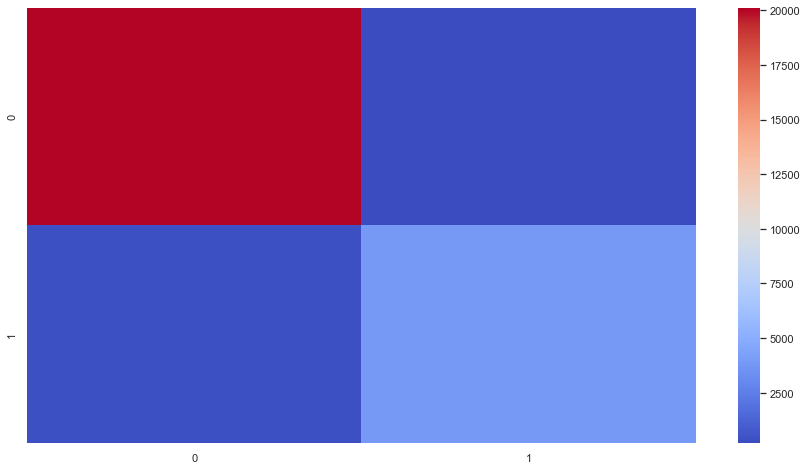

In [70]:
sns.heatmap(cm, cmap="coolwarm")

In [71]:
print(metrics.classification_report(test_y, pred_y_knn5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20274
           1       0.95      0.90      0.93      4264

    accuracy                           0.98     24538
   macro avg       0.97      0.95      0.96     24538
weighted avg       0.98      0.98      0.98     24538



In [72]:
print(f"The accuracy is: {metrics.accuracy_score(test_y, pred_y_knn5)}")
print(f"The AUC is: {metrics.roc_auc_score(test_y, pred_y_knn5)}")
print(f"The Cohen Kappa is: {metrics.cohen_kappa_score(test_y, pred_y_knn5)}")

The accuracy is: 0.9753851169614476
The AUC is: 0.9465830319741493
The Cohen Kappa is: 0.9124297314414833


In [73]:
for k in range(1,7):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("AUC is ", round(metrics.roc_auc_score(test_y, pred_y)*100,2),"% for k =",k)

AUC is  94.01 % for k = 2
AUC is  95.54 % for k = 3
AUC is  93.99 % for k = 4
AUC is  94.66 % for k = 5
AUC is  93.25 % for k = 6
AUC is  93.74 % for k = 7


A K value of 5 has the best AUC.

#### Gaussian Naive Bayes Classifier

In [74]:
from sklearn import naive_bayes

In [75]:
g_nb = naive_bayes.GaussianNB()

In [76]:
g_nb.fit(train_X, train_y)

GaussianNB()

In [77]:
pred_y_gnb = g_nb.predict(test_X)

In [78]:
cm_gnb = metrics.confusion_matrix(test_y, pred_y_gnb)
cm_gnb

array([[19555,   719],
       [ 1242,  3022]], dtype=int64)

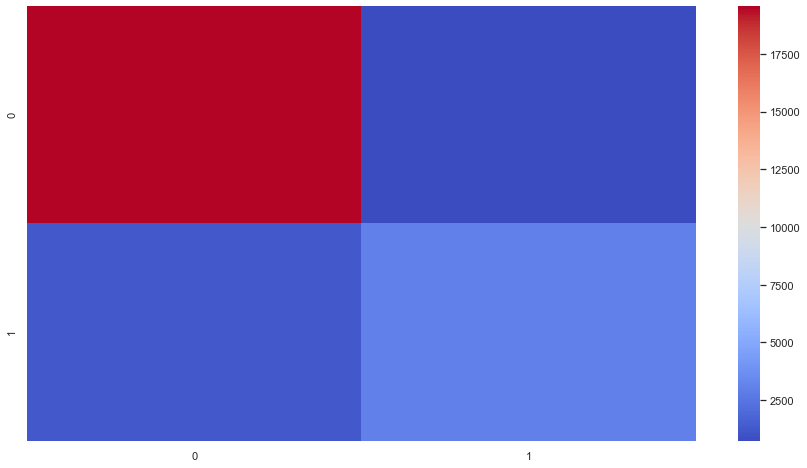

In [79]:
sns.heatmap(cm_gnb, cmap="coolwarm")

In [80]:
print(metrics.classification_report(test_y, pred_y_gnb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     20274
           1       0.81      0.71      0.76      4264

    accuracy                           0.92     24538
   macro avg       0.87      0.84      0.85     24538
weighted avg       0.92      0.92      0.92     24538



In [81]:
print(f"The accuracy is: {metrics.accuracy_score(test_y, pred_y_gnb)}")
print(f"The AUC is: {metrics.roc_auc_score(test_y, pred_y_gnb)}")
print(f"The Cohen Kappa is: {metrics.cohen_kappa_score(test_y, pred_y_gnb)}")

The accuracy is: 0.9200831363599316
The AUC is: 0.8366300306809838
The Cohen Kappa is: 0.707524852294301


#### Bernoulli Naive Bayes Classifier

In [82]:
b_nb = naive_bayes.BernoulliNB()

In [83]:
b_nb.fit(train_X, train_y)

BernoulliNB()

In [84]:
pred_y_bnb = b_nb.predict(test_X)

In [85]:
cm_bnb = metrics.confusion_matrix(test_y, pred_y_bnb)
cm_bnb

array([[20106,   168],
       [  111,  4153]], dtype=int64)

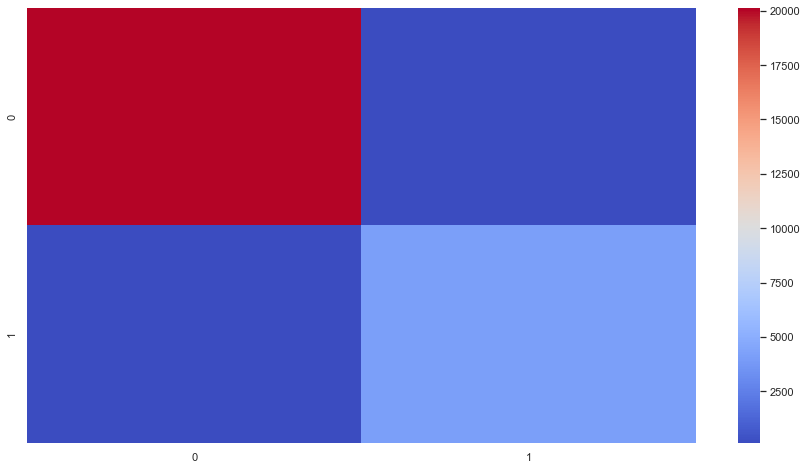

In [86]:
sns.heatmap(cm_bnb, cmap="coolwarm")

In [87]:
print(metrics.classification_report(test_y, pred_y_bnb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20274
           1       0.96      0.97      0.97      4264

    accuracy                           0.99     24538
   macro avg       0.98      0.98      0.98     24538
weighted avg       0.99      0.99      0.99     24538



In [88]:
print(f"The accuracy is: {metrics.accuracy_score(test_y, pred_y_bnb)}")
print(f"The AUC is: {metrics.roc_auc_score(test_y, pred_y_bnb)}")
print(f"The Cohen Kappa is: {metrics.cohen_kappa_score(test_y, pred_y_bnb)}")

The accuracy is: 0.9886298801858342
The AUC is: 0.9828408148885597
The Cohen Kappa is: 0.9606114040817231


#### Decision Tree Classifier

In [89]:
from sklearn import tree

In [90]:
dt = tree.DecisionTreeClassifier(criterion='entropy', class_weight="balanced")

In [91]:
dt.fit(train_X, train_y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

In [92]:
pred_y_dt = dt.predict(test_X)

In [93]:
metrics.confusion_matrix(test_y, pred_y_dt)

array([[20182,    92],
       [  110,  4154]], dtype=int64)

In [94]:
print(metrics.classification_report(test_y, pred_y_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20274
           1       0.98      0.97      0.98      4264

    accuracy                           0.99     24538
   macro avg       0.99      0.98      0.99     24538
weighted avg       0.99      0.99      0.99     24538



In [95]:
print(f"The accuracy is: {metrics.accuracy_score(test_y, pred_y_dt)}")
print(f"The AUC is: {metrics.roc_auc_score(test_y, pred_y_dt)}")
print(f"The Cohen Kappa is: {metrics.cohen_kappa_score(test_y, pred_y_dt)}")

The accuracy is: 0.9917678702420735
The AUC is: 0.9848323974680091
The Cohen Kappa is: 0.9712837071770489


#### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf = RandomForestClassifier(n_estimators=5, max_features=7, random_state=123, class_weight="balanced")

In [98]:
rf.fit(train_X, train_y)

RandomForestClassifier(class_weight='balanced', max_features=7, n_estimators=5,
                       random_state=123)

In [99]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
TotalPaid,0.481646
DaysTillReleased,0.396314
VehicleAge,0.056233
TitleRenounciation,0.026221
City,0.011451
Stolen Recovered,0.005643
Frankford,0.004262
Bermans,0.003766
Scofflaw,0.003470
Accident,0.001726


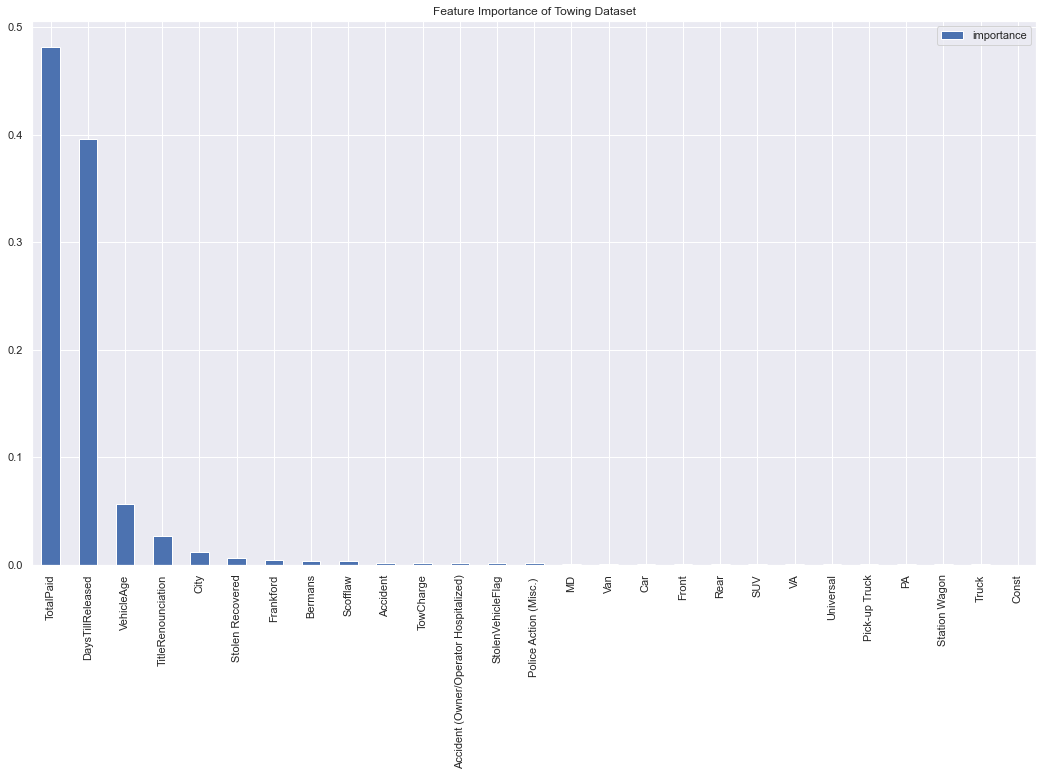

In [100]:
feature_importances.plot(kind = 'bar',figsize=(18,10),
                         title='Feature Importance of Towing Dataset')

In [101]:
pred_y_rf = rf.predict(test_X)

In [102]:
print(metrics.classification_report(test_y, pred_y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20274
           1       0.98      0.99      0.98      4264

    accuracy                           0.99     24538
   macro avg       0.99      0.99      0.99     24538
weighted avg       0.99      0.99      0.99     24538



In [137]:
print(f"The accuracy is: {metrics.accuracy_score(test_y, pred_y_rf)}")
print(f"The AUC is: {metrics.roc_auc_score(test_y, pred_y_rf)}")
print(f"The Cohen Kappa is: {metrics.cohen_kappa_score(test_y, pred_y_rf)}")

The accuracy is: 0.9939277854755889
The AUC is: 0.9910472192316113
The Cohen Kappa is: 0.9789217988534359


We can see from this that TotalPaid and DaysTillReleased has the biggest impact on whether the car is auctioned or not.

#### ANN

In [113]:
from sklearn import neural_network

In [114]:
ann = neural_network.MLPRegressor(alpha=1e-5,
                                   hidden_layer_sizes=(20),
                                   random_state=1)

In [116]:
ann.fit(train_X_scale, train_y)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=20, random_state=1)

In [125]:
pred_y_ann_raw = ann.predict(test_X_scale)

In [130]:
pred_y_ann = pred_y_ann_raw
pred_y_ann[pred_y_ann_raw >= 0.5] = 1
pred_y_ann[pred_y_ann_raw < 0.5] = 0

In [131]:
print(metrics.classification_report(test_y, pred_y_ann))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     20274
           1       0.98      1.00      0.99      4264

    accuracy                           0.99     24538
   macro avg       0.99      1.00      0.99     24538
weighted avg       0.99      0.99      0.99     24538



In [136]:
print(f"The accuracy is: {metrics.accuracy_score(test_y, pred_y_ann)}")
print(f"The AUC is: {metrics.roc_auc_score(test_y, pred_y_ann)}")
print(f"The Cohen Kappa is: {metrics.cohen_kappa_score(test_y, pred_y_ann)}")

The accuracy is: 0.9948651071806993
The AUC is: 0.9951331972428018
The Cohen Kappa is: 0.982262251749732


#### Comparing Models

In [133]:
acc = [metrics.accuracy_score(test_y, pred_y_knn5),
       metrics.accuracy_score(test_y, pred_y_gnb),
       metrics.accuracy_score(test_y, pred_y_bnb),
       metrics.accuracy_score(test_y, pred_y_dt),
       metrics.accuracy_score(test_y, pred_y_rf),
       metrics.accuracy_score(test_y, pred_y_ann)]


pre = [metrics.precision_score(test_y, pred_y_knn5),
       metrics.precision_score(test_y, pred_y_gnb),
       metrics.precision_score(test_y, pred_y_bnb),
       metrics.precision_score(test_y, pred_y_dt),
       metrics.precision_score(test_y, pred_y_rf),
       metrics.precision_score(test_y, pred_y_ann)]


rec = [metrics.recall_score(test_y, pred_y_knn5),
       metrics.recall_score(test_y, pred_y_gnb),
       metrics.recall_score(test_y, pred_y_bnb),
       metrics.recall_score(test_y, pred_y_dt),
       metrics.recall_score(test_y, pred_y_rf),
       metrics.recall_score(test_y, pred_y_ann)]

f1  = [metrics.f1_score(test_y, pred_y_knn5),
       metrics.f1_score(test_y, pred_y_gnb),
       metrics.f1_score(test_y, pred_y_bnb),
       metrics.f1_score(test_y, pred_y_dt),
       metrics.f1_score(test_y, pred_y_rf),
       metrics.f1_score(test_y, pred_y_ann)]

auc  = [metrics.roc_auc_score(test_y, pred_y_knn5),
        metrics.roc_auc_score(test_y, pred_y_gnb),
        metrics.roc_auc_score(test_y, pred_y_bnb),
        metrics.roc_auc_score(test_y, pred_y_dt),
        metrics.roc_auc_score(test_y, pred_y_rf),
        metrics.roc_auc_score(test_y, pred_y_ann)]

In [135]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1, 'AUC':auc},
             index = ['k-NN (k=5)',
                      'Gaussian Naive Bayes',
                      'Bernoulli Naive Bayes',
                      'Decision Tree',
                      'Random Forest',
                        'Artificial NN'])

,Accuracy,Precision,Recall,F1 Score,AUC
k-NN (k=5),0.975385,0.953419,0.902439,0.927229,0.946583
Gaussian Naive Bayes,0.920083,0.807805,0.708724,0.755028,0.836630
Bernoulli Naive Bayes,0.988630,0.961120,0.973968,0.967501,0.982841
Decision Tree,0.991768,0.978333,0.974203,0.976263,0.984832
Random Forest,0.993928,0.978600,0.986632,0.982600,0.991047
Artificial NN,0.994865,0.975414,0.995544,0.985376,0.995133


Artificial NN has the highest Accuracy and AUC. To predict if a car is towed we recomend using a NN since it has a 99.49% accuracy, followed closely by random forest with a 99.39% accuracy.